In [1]:
import pandas as pd
df = pd.read_csv("glass.csv")
# df.head()

In [2]:
# df.isnull().sum()

In [3]:
accuracy_dic = {}
x = df.iloc[:,:-2].values
y = df.iloc[:,9].values
# [:,9] return row vector
# [:,9:10] return column vector

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [5]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# for binary model, only 2 categories
# clf = LogisticRegression(multi_class='ovr',solver='liblinear',C=.5) 
# for multi-value model, more than 2 categories set solver='lbfgs' / 'newton-cg'#
clf = LogisticRegression(multi_class='multinomial',solver='newton-cg') 

# clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round(accuracy_score(y_pred_log_reg,y_test)*100,2)
accuracy_dic["Log_Reg"]=acc_log_reg
print (str(accuracy_dic["Log_Reg"])+" percent")

57.75 percent


In [6]:
# K_NN

from sklearn.neighbors import KNeighborsClassifier

# use weights = 'distance', if you want to give more power to nearest neighbors. Bydefault it is uniform. 
# http://scikit-learn.org/stable/modules/neighbors.html
clf = KNeighborsClassifier(n_neighbors=6)

clf.fit(x_train,y_train)
y_pred_knn = clf.predict(x_test)
acc_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
accuracy_dic["acc_knn"]=acc_knn
print (str(accuracy_dic["acc_knn"])+" percent")

69.01 percent


In [7]:
# Naive Baye's

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)
y_pred_gnb = clf.predict(x_test)
from sklearn.metrics import accuracy_score
acc_gnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
accuracy_dic["acc_gnb"] = acc_gnb
print (str(acc_gnb) + ' percent')

49.3 percent


In [8]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred_decision = clf.predict(x_test)
acc_decision = round(accuracy_score(y_pred_decision,y_test)*100,2)
accuracy_dic["acc_decision_tree"] = acc_decision
print (str(acc_decision)+' percent')

64.79 percent


In [9]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30)
clf.fit(x_train,y_train)
y_pred_random_forest = clf.predict(x_test)
acc_random_forest = round(accuracy_score(y_pred_random_forest,y_test)*100,2)
accuracy_dic["acc_random_forest"] = acc_random_forest
print (str(acc_random_forest)+' percent')

69.01 percent


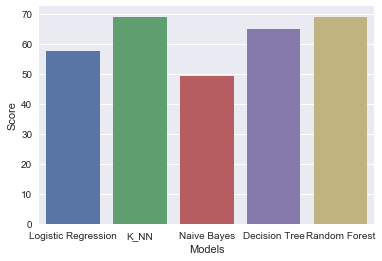

In [10]:
data_frame = pd.DataFrame({'Models':['Logistic Regression','K_NN','Naive Bayes','Decision Tree','Random Forest'],
                         'Score':[acc_log_reg,acc_knn,acc_gnb,acc_decision,acc_random_forest]})
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# data_frame.head()
sns.barplot(x='Models',y='Score',data=data_frame)